In [49]:
# <api>
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

# Load classes and functions from the Part 1
from jupyter_cms.loader import load_notebook
smpl1 = load_notebook('./Sampling_part1.ipynb')
smpl2 = load_notebook('./Sampling_part2.ipynb')

In [50]:
#def calculateA(Sigma):
#    sig=np.array(Sigma)
#    if (sig.shape[0]!=2 or sig.shape[1]!=2 or sig[0,1]!=sig[1,0]):
#        return('The covariance matrix is not symmetric')
#    return np.array([[np.sqrt(sig[0,0]),0],[np.sqrt(sig[1,1]),0]])

In [54]:
class SimpleNormalSampling (smpl1.Sampling):
    def __init__ (self, mu, sigma, A):              
        self.mu = np.array(mu)
        self.sigma = np.array(sigma)
        self.A = np.array(A)    

    def sample (self):
        x = [np.random.normal(), np.random.normal()]        
        return (np.dot(self.A,x) + self.mu)

In [55]:
A = [[1.6, 1.2],[0.8,0.6]]
#A = [[0.56, 1.92],[0.28,0.96]]
#A = [[2, 0],[1, 0]]
np.dot(np.array(A), np.array(A).T)

array([[4., 2.],
       [2., 1.]])

In [56]:
sampling = SimpleNormalSampling(mu=[2,-1], sigma=[[4,2],[2,1]], A=A)
smpl1.show_sampling(sampling, plotter=smpl2.gauss_hist2d, exp=False)

Output()

In [57]:
data = np.array([sampling.sample() for _ in range(100)])

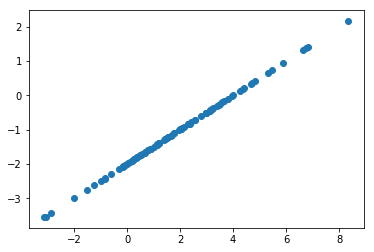

In [58]:
x = np.array(data)[:,0]
y = np.array(data)[:,1]
plt.scatter(x, y)
plt.show()

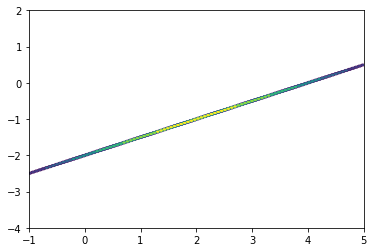

In [59]:
# <api>
from scipy.stats import multivariate_normal
p2d = multivariate_normal(mean=[2,-1], cov=[[4, 2],[2, 1.0001]], allow_singular=False)
x = np.linspace(-1, 5, 200)
y = np.linspace(-4, 2, 200)
X, Y = np.meshgrid(x, y)
XY = np.empty(X.shape + (2,))
XY[:,:,0] = X; XY[:,:,1] = Y
plt.contour(X, Y, p2d.pdf(XY))

In [134]:
#api
class RejectionSamplingD (smpl1.Sampling):
    def __init__ (self, d, p, q, c):
        """
        q is assumed to support sampling q.rvs and density evaluation q.pdf
        """
        self.d = d
        self.p = p
        self.q = q
        self.c = c
        self.tries = 0
        self.samples = 0
    
    def sample (self):
        while True:
            self.tries += 1 
            self.passed = 1
            for i in range(self.d):
                x = self.q.rvs()
                u = np.random.uniform(low=0, high=self.c*self.q.pdf(x))
                if u < self.p.pdf(x):
                    self.passed = self.passed*1
                else:
                    self.passed = self.passed*0
            if self.passed>0:
                self.samples += 1
                return True
            
    def sample1 (self):
        while self.tries<100000:
            self.tries += 1 
            self.passed = 1
            h, u, ppdf = 1, 1, 1
            for i in range(self.d):
                x = self.q.rvs()                
                ppdf *= self.p.pdf(x)
                h *= self.q.pdf(x)
            u = np.random.uniform(low=0, high=self.c*h)
            if u < ppdf:                
                self.samples += 1
                return True           
                
            
    def __str__ (self):
        return "Rejection sampling: %d tries for %d samples" % (self.tries, self.samples)

In [135]:
d = 5
s2 = 2
mu = np.zeros(d)
sig = np.eye(d)*s2

In [145]:
N = 100
D=50
sigP = 1
sigQ = sigP * 1.01
sampling = RejectionSamplingD(d=1, p=norm(loc=0, scale=sigP), q=norm(loc=0, scale=sigQ), c=sigQ/sigP)
ratio = []
for i in range(D):
    sampling.d=i
    sampling.c=(sigQ/sigP)**i
    sampling.tries = 0
    sampling.samples = 0
    for n in range(N):
        sampling.sample1()
    ratio.append(sampling.tries/sampling.samples)
   

In [146]:
print(sampling)

Rejection sampling: 163 tries for 100 samples


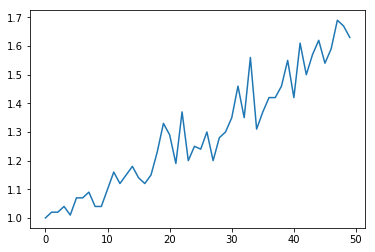

In [147]:
plt.plot(ratio)

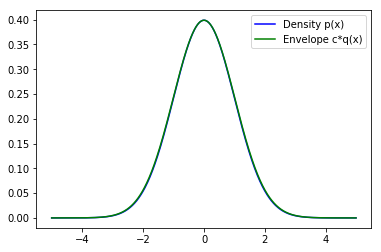

In [139]:
sp = 1
sq = 1.01
c = sq/sp
p = norm(loc=0, scale=sp)
q = norm(loc=0, scale=sq)
x = np.arange(-5,5,0.01)
plt.plot(x, p.pdf(x), 'b-', x, c*q.pdf(x), 'g-')
plt.legend(['Density p(x)', 'Envelope c*q(x)']);

In [152]:
s1 = np.array([[4,2],[2,1]])
s2 = np.array([[4,2],[1,1]])
np.sum(s1)

9

In [45]:
step = 0.005
sig = np.array([[4,2],[2,1]])
for a11 in np.arange(-2., 2.+step, step):
    for a22 in np.arange(-2., 2.+step, step):
        a12 = np.sqrt(sig[0,0] - a11**2)
        a21 = np.sqrt(sig[1,1] - a22**2)
        diff = sig[0,1] - (a11*a21 + a12*a22)
        if np.abs(diff) < 0.00000001:
            print('A: ', a11, a12, a21, a22, 'error: ', diff)
        

/home/mo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


A:  -4.263256414560601e-14 2.0 3.5762786865234375e-07 0.999999999999936 error:  1.2789769243681803e-13
A:  0.34499999999995 1.9700190354410372 0.17255433926773717 0.9849999999999364 error:  3.0433429110132693e-09
A:  0.5599999999999454 1.920000000000016 0.28000000000021635 0.9599999999999369 error:  0.0
A:  0.7349999999999417 1.8600470424158861 0.3675595189899401 0.9299999999999375 error:  4.095757510924614e-09
A:  0.7599999999999412 1.8499729727755725 0.3799671038394184 0.9249999999999376 error:  1.2647751734817803e-09
A:  0.9499999999999371 1.759971590679838 0.47497368348163044 0.8799999999999386 error:  8.943314977472028e-10
A:  1.1999999999999318 1.6000000000000512 0.6000000000000796 0.7999999999999403 error:  0.0
A:  1.5449999999999244 1.2700295272158966 0.7725121358270505 0.6349999999999438 error:  3.6524250290881355e-10
A:  1.5999999999999233 1.2000000000001023 0.8000000000000416 0.5999999999999446 error:  0.0
A:  1.7599999999999199 0.9499473669631818 0.8799857953399305 0.474999

In [33]:
A = np.array([[0.56, 1.92],[0.28,0.96]])
np.dot(A,A.T)

array([[4., 2.],
       [2., 1.]])